In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## 1.Data Preprocessing 

In [2]:
path = "C:\\Users\\nagham\\Downloads\\titanic-passengers.csv"
df = pd.read_csv(path, encoding= "ISO-8859-1", sep=";")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data cleaning 
finding missing values

In [5]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,True,False,False,False,False,True,False


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Age ,Cabin and Embarked have a missing values 

In [8]:
df.isnull().sum().sum() # total number of missing values

866

Replacing missing values

In [9]:
df["Embarked"].value_counts().sort_values(ascending=False)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df["Embarked"].fillna("S",inplace=True)
df["Age"].fillna(df["Age"].mean(),inplace=True)
df.drop("Cabin",axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


Data transformation

In [11]:
# Survived , Sex and Embarked are categorical features that need to be encoded 

In [12]:
encoder=LabelEncoder()
df["Survived"]=encoder.fit_transform(df["Survived"])
df["Embarked"]=encoder.fit_transform(df["Embarked"])
df["Sex"]=encoder.fit_transform(df["Sex"])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,2
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,0
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,0
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,2
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,2


## 2.Data Visualization

In [13]:
# correlation between age and sex in the survived

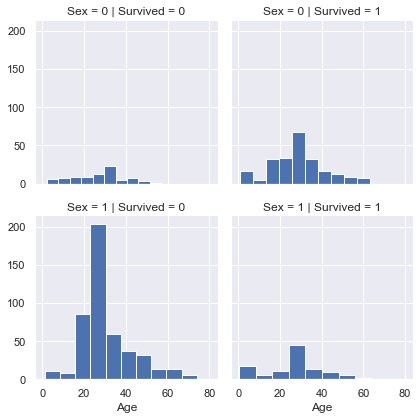

In [14]:
sns.set(style="darkgrid")
g=sns.FacetGrid(df,row="Sex",col="Survived")
g.map(plt.hist,"Age",bins=10)

In [15]:
#correlation between other features impact on the survived 

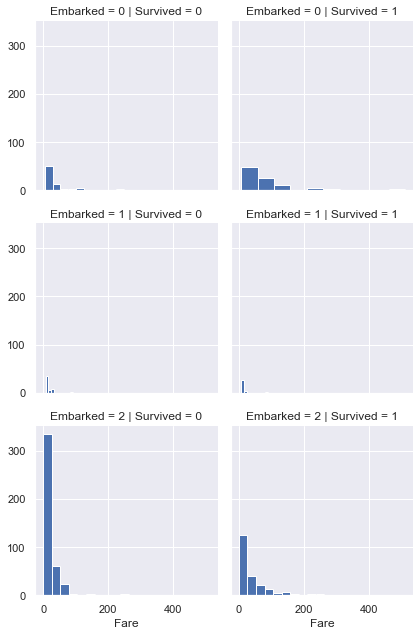

In [16]:
g=sns.FacetGrid(df,row="Embarked",col="Survived")
g.map(plt.hist,"Fare",bins=10)

In [17]:
# This map shows the correlations between each pair of features. 
# The pair of features that represent the highest correlation is Parch and SibSp 

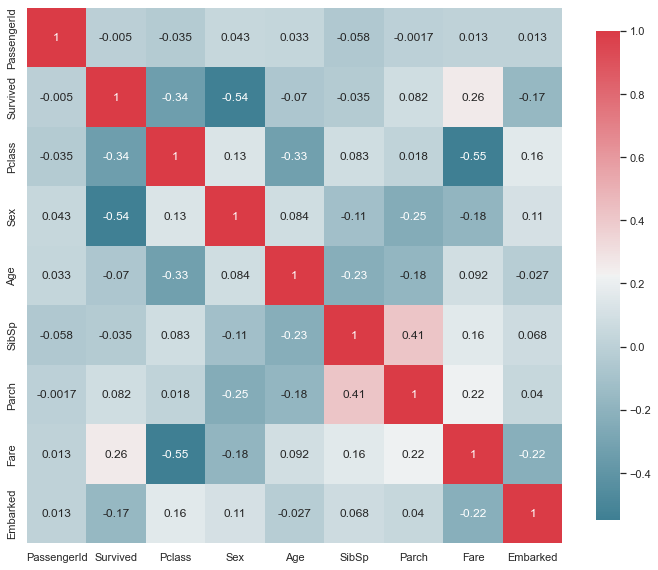

In [18]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)

In [19]:
# Relation between Pclass and Survived

In [20]:
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [21]:
 # Splitting the column

In [22]:
split_name1=df["Name"].str.split(pat=" ")
split_name1                         

0                        [Collander,, Mr., Erik, Gustaf]
1                           [Moen,, Mr., Sigurd, Hansen]
2                            [Jensen,, Mr., Hans, Peder]
3      [Palsson,, Mrs., Nils, (Alma, Cornelia, Berglu...
4                             [Davidson,, Mr., Thornton]
                             ...                        
886            [Nasser,, Mrs., Nicholas, (Adele, Achem)]
887                            [Sirayanian,, Mr., Orsen]
888                              [Cacic,, Miss., Marija]
889                [Petroff,, Mr., Pastcho, ("Pentcho")]
890    [Phillips,, Miss., Kate, Florence, ("Mrs, Kate...
Name: Name, Length: 891, dtype: object

In [23]:
# extracting the second element of each column in a new series

In [24]:
split_name2=df["Name"].str.split(pat=" ").str.get(1)         
split_name2                                                 

0        Mr.
1        Mr.
2        Mr.
3       Mrs.
4        Mr.
       ...  
886     Mrs.
887      Mr.
888    Miss.
889      Mr.
890    Miss.
Name: Name, Length: 891, dtype: object

In [25]:
# splitting a second time and extracting the first element
 # named title

In [26]:
df["title"]=split_name2                     
df                                         

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,2,Mr.
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,2,Mr.
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,2,Mr.
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,2,Mrs.
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,2,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,0,Mrs.
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,0,Mr.
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,2,Miss.
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,2,Mr.


In [27]:
# we drop the Names column because we no longer need it 
# dropping Ticket and PassengerId columns because they're not useful

In [28]:
drop_step=df.drop("Name",axis=1)
drop_step.drop("Ticket",axis=1,inplace=True) 
drop_step.drop("PassengerId",axis=1,inplace=True)
drop_step

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,2,1,28.000000,0,0,13.0000,2,Mr.
1,0,3,1,25.000000,0,0,7.6500,2,Mr.
2,0,3,1,20.000000,0,0,7.8542,2,Mr.
3,0,3,0,29.000000,0,4,21.0750,2,Mrs.
4,0,1,1,31.000000,1,0,52.0000,2,Mr.
...,...,...,...,...,...,...,...,...,...
886,1,2,0,14.000000,1,0,30.0708,0,Mrs.
887,0,3,1,22.000000,0,0,7.2292,0,Mr.
888,0,3,0,30.000000,0,0,8.6625,2,Miss.
889,0,3,1,29.699118,0,0,7.8958,2,Mr.


In [29]:
# correlation between title and other features (e.g Sex, Fare, Age)

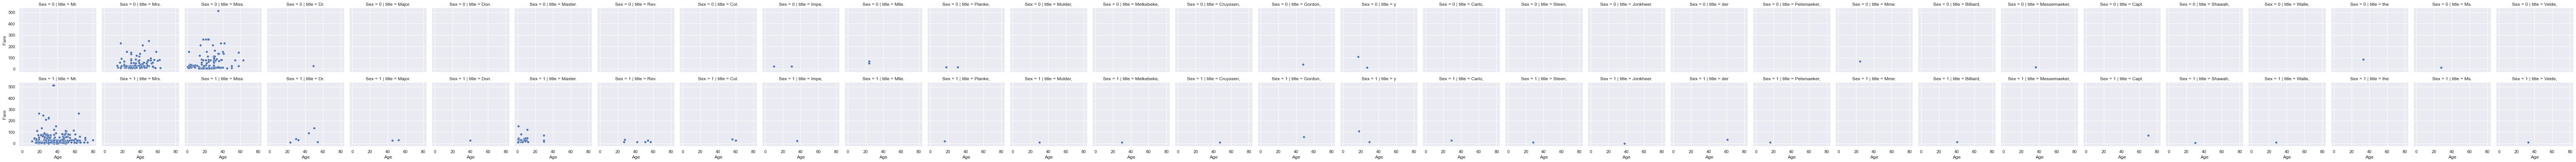

In [30]:
g = sns.FacetGrid(drop_step, col="title",row="Sex")
g.map(sns.scatterplot,"Age","Fare")

In [31]:
Title_Dictionary = { "Capt":     "Officer",
                    
                    "Col":     "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",
                    
                    "Mrs" :       "Mrs",

                    "Mr" :        "Mrs",

                    "Master" :    "Master" } 
new_title=drop_step.replace(to_replace=Title_Dictionary,inplace=False,regex=True)
new_title

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,2,1,28.000000,0,0,13.0000,2,Mrs.
1,0,3,1,25.000000,0,0,7.6500,2,Mrs.
2,0,3,1,20.000000,0,0,7.8542,2,Mrs.
3,0,3,0,29.000000,0,4,21.0750,2,Mrss.
4,0,1,1,31.000000,1,0,52.0000,2,Mrs.
...,...,...,...,...,...,...,...,...,...
886,1,2,0,14.000000,1,0,30.0708,0,Mrss.
887,0,3,1,22.000000,0,0,7.2292,0,Mrs.
888,0,3,0,30.000000,0,0,8.6625,2,Miss.
889,0,3,1,29.699118,0,0,7.8958,2,Mrs.


In [32]:
# correlation between new title that replaced and other features

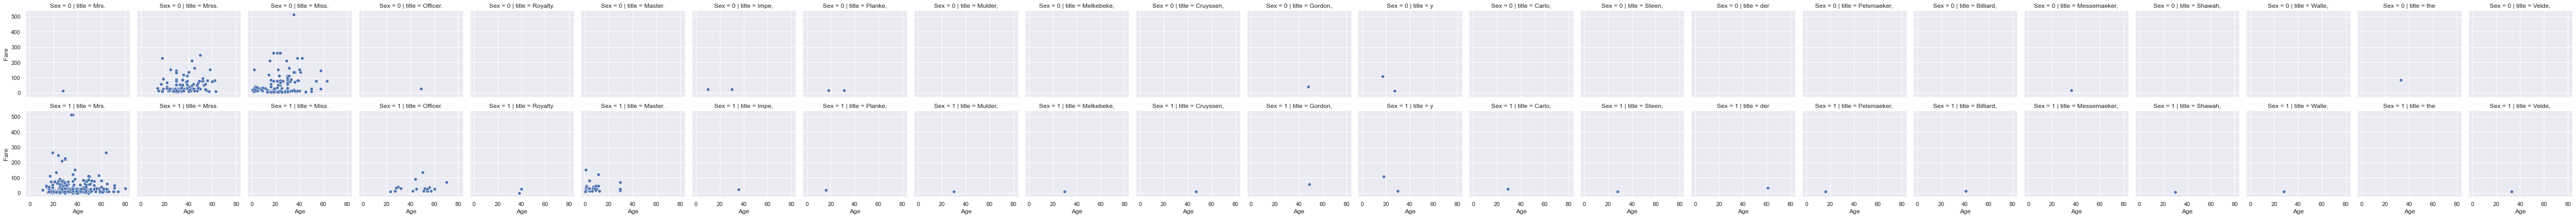

In [33]:
g = sns.FacetGrid(new_title,col="title",row="Sex")
g.map(sns.scatterplot,"Age","Fare")

In [34]:
# Finally, use the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize

In [35]:
new_title["FamilySize"]=new_title["SibSp"]+new_title["Parch"]
new_title

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,FamilySize
0,0,2,1,28.000000,0,0,13.0000,2,Mrs.,0
1,0,3,1,25.000000,0,0,7.6500,2,Mrs.,0
2,0,3,1,20.000000,0,0,7.8542,2,Mrs.,0
3,0,3,0,29.000000,0,4,21.0750,2,Mrss.,4
4,0,1,1,31.000000,1,0,52.0000,2,Mrs.,1
...,...,...,...,...,...,...,...,...,...,...
886,1,2,0,14.000000,1,0,30.0708,0,Mrss.,1
887,0,3,1,22.000000,0,0,7.2292,0,Mrs.,0
888,0,3,0,30.000000,0,0,8.6625,2,Miss.,0
889,0,3,1,29.699118,0,0,7.8958,2,Mrs.,0


In [36]:
# correlation between Family Size and Survived 

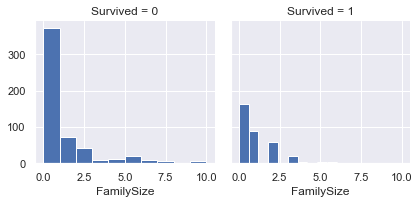

In [37]:
g=sns.FacetGrid(new_title,col="Survived")
g.map(plt.hist,"FamilySize")